

The case study we take up in this module pertains to red wines. Dataset that we have contains chemical properties over 4000 red wines . In class we'll take up two important chemical properties which control wine's aroma and potency , namely sulphate and alcohol content.

We want to check how many groups exist within wines based on these chemicals. Lets begin.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

myfile='winequality-red.csv'

import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

wine=pd.read_csv(myfile)

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.shape

(1599, 12)

In [ ]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
wine=wine[["sulphates","alcohol"]]

In [ ]:
wine.head()

,sulphates,alcohol
0,0.56,9.4
1,0.68,9.8
2,0.65,9.8
3,0.58,9.8
4,0.56,9.4


In [ ]:
wine.describe()

,sulphates,alcohol
count,1599.000000,1599.000000
mean,0.658149,10.422983
std,0.169507,1.065668
min,0.330000,8.400000
25%,0.550000,9.500000
50%,0.620000,10.200000
75%,0.730000,11.100000
max,2.000000,14.900000


In [ ]:
#### There is scale difference - Perform scaling

You can see that scale of sulphates and alcohol are very different. If we let them be like that , distances will be dominated by alcohol percentages alone due to their scale. We need to scale them

In [ ]:
pd.DataFrame(scale(wine))

,0,1
0,-0.579207,-0.960246
1,0.128950,-0.584777
2,-0.048089,-0.584777
3,-0.461180,-0.584777
4,-0.579207,-0.960246
...,...,...
1594,-0.461180,0.072294
1595,0.601055,0.729364
1596,0.542042,0.541630
1597,0.305990,-0.209308


In [ ]:
wine_std=pd.DataFrame(scale(wine),columns=list(wine.columns))

Output of function `scale` is matrix , we need to convert it back to data frame in order to keep on using it as data frame.

In [ ]:
wine_std.describe()

,sulphates,alcohol
count,1.599000e+03,1.599000e+03
mean,7.639596e-16,9.437243e-16
std,1.000313e+00,1.000313e+00
min,-1.936507e+00,-1.898919e+00
25%,-6.382196e-01,-8.663789e-01
50%,-2.251281e-01,-2.093081e-01
75%,4.240158e-01,6.354971e-01
max,7.918677e+00,4.202453e+00


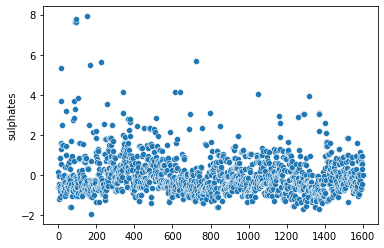

In [ ]:
import seaborn as sns

sns.scatterplot(y = wine_std['sulphates'],x = list(wine_std.index))

#sns.scatterplot(y = wine_std['alcohol'],x = list(wine_std.index))

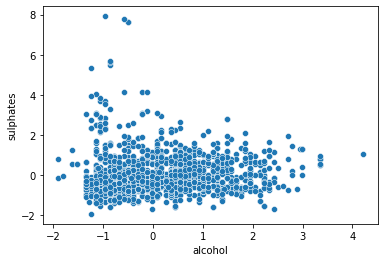

In [ ]:
sns.scatterplot(x = wine_std['alcohol'],y = wine_std['sulphates'])

In [ ]:
wine_std.loc[wine_std['sulphates']>6,'sulphates'] = 6

In [ ]:
#### Fit k means ####

kmeans = KMeans(n_clusters=10)
kmeans.fit(wine_std[['sulphates','alcohol']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = kmeans.labels_

#print(labels)
wine_std["cluster"]=labels

In [ ]:
wine_std

,sulphates,alcohol,cluster
0,-0.579207,-0.960246,5
1,0.128950,-0.584777,1
2,-0.048089,-0.584777,1
3,-0.461180,-0.584777,5
4,-0.579207,-0.960246,5
...,...,...,...
1594,-0.461180,0.072294,8
1595,0.601055,0.729364,0
1596,0.542042,0.541630,0
1597,0.305990,-0.209308,9


In [ ]:
wine_std['cluster'].value_counts()

5    326
1    285
8    269
0    194
3    163
9    132
2     93
7     90
6     39
4      8
Name: cluster, dtype: int64

In [ ]:
print(silhouette_score(wine_std[['sulphates','alcohol']],labels))

print(kmeans.inertia_)

0.46428193588698236
1192.787288674237


In [ ]:
wine_std['cluster'].value_counts()

0    892
1    504
2    203
Name: cluster, dtype: int64

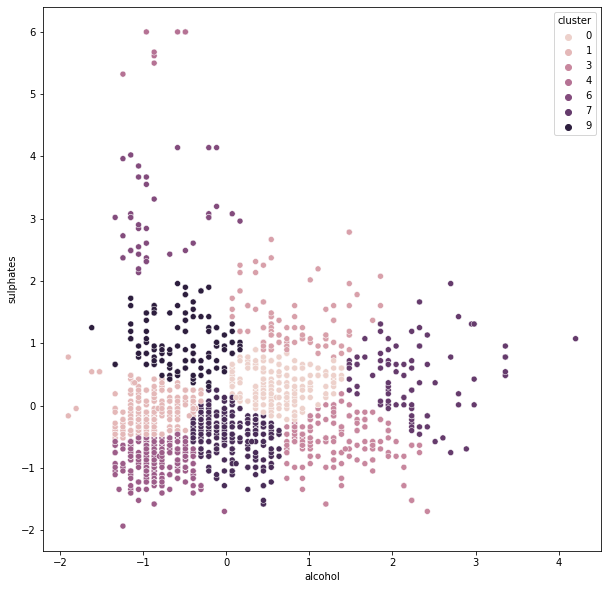

In [ ]:
#### visualize the clusters ######
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.scatterplot(x = wine_std['alcohol'], y = wine_std['sulphates'],hue = wine_std['cluster'])

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

In the code below , we are trying different values of cluster numbers and for each we are examning silhoutte scores along with their silhoutte plots and visual representation of clusters.

Most of the code below has to do with how the plots are made pretty.

You dont need to do all that every time you do segmentation using K-means. This is more to do with giving you first hand experience as to what silhoutte plots are and how the eventual clusters look like.

You should also notice , how silhoutte scores both average and individual detriorate as we keep on unneccesarily increasing number of clusters. 

In [ ]:
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(wine_std[['sulphates','alcohol']])
    silhouette_avg = silhouette_score(wine_std[['sulphates','alcohol']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.42301606159497196
For n_clusters = 3 The average silhouette_score is : 0.46463525265949907
For n_clusters = 4 The average silhouette_score is : 0.4260854136829477
For n_clusters = 5 The average silhouette_score is : 0.4011279462741914
For n_clusters = 6 The average silhouette_score is : 0.39353715507000453
For n_clusters = 7 The average silhouette_score is : 0.3826608862022229
For n_clusters = 8 The average silhouette_score is : 0.3754779128458579
For n_clusters = 9 The average silhouette_score is : 0.3435764794858635


From silhoutte's score above we decided value of n_clusters as 3

We can decide number of cluster using SSW as well as mentioned in the theoretical discussion. SSW is named `inertia_` as kmeans function's attribute.

In [ ]:
kmeans.inertia_

1192.787288674237

Lets look at inertia/SSW values for many Ks , see if our conclusions match with results obtained from silhoutte score.

In [ ]:
Ks=np.linspace(2,15,14)

In [ ]:
Ks

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15.])

In [ ]:
ssw=[]
for k in range_n_clusters:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(wine_std)
    ssw.append(kmeans.inertia_)
#plt.plot(Ks,ssw)

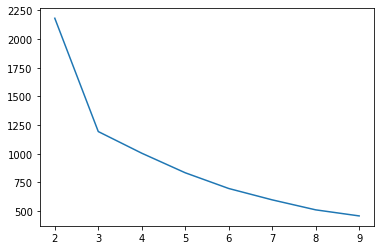

In [ ]:
plt.plot(range_n_clusters,ssw)

You can see here the clear elbow point at k=3.

We can try hierarchical clustering as well, it gives most efficient clusters but at much more computational cost. Lets see if results from it are very different from K-means.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
for n_clusters in range(2,10):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)


NameError: ignored

We have agreement on number of clusters. Lets see how the end results differ

In [ ]:
s = 3
hclust = AgglomerativeClustering(n_clusters=s, affinity='euclidean',linkage='ward')
hclust.fit(wine_std)

In [ ]:
labels = hclust.fit_predict(X)
wine_std["cluster"]=labels

In [ ]:
for i in range(s):
    # select only data observations with cluster label == i
    hc = wine_std[wine_std["cluster"]==i].as_matrix()
    # plot the data observations
    plt.plot(hc[:,0],hc[:,1],'o')

plt.show()

We can see that kmeans did an excellent job and we did not really need to get into hierarchical clustering to get the best results.

Next we look density based clustering algorithm dbscan. We will take a toy data to bring out clear difference between k-means and dbscan. This example demonstrate how k-means can no capture non-spherical groups in the data. We will be using make_moons function to make data which has two moon shaped very apparent groups. Lets see.

In [ ]:
from sklearn.datasets import make_moons

mydata = make_moons(n_samples = 2000,noise=0.05)
print(mydata[0].shape)
mydata=pd.DataFrame(mydata[0],columns=["X","Y"])
mydata.head()

(2000, 2)


,X,Y
0,-0.782830,0.564156
1,1.515273,-0.382129
2,-0.890121,0.386952
3,0.999835,-0.395314
4,-0.748290,0.572061


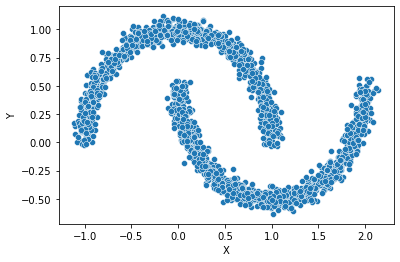

In [ ]:
sns.scatterplot(mydata['X'],mydata['Y'])

We can ask k-means to make as many clusters and it will oblige as opposed to dbscan which finds on its own how many natural clusters are there in the data

In [ ]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_
#ggplot(mydata,aes(x='X',y='Y',color='cluster'))+geom_point()

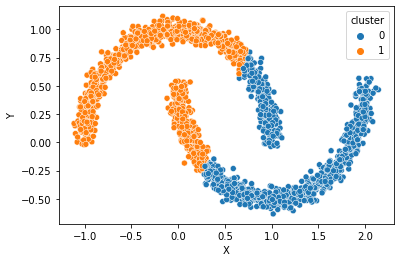

In [ ]:
sns.scatterplot(mydata['X'],mydata['Y'],hue = mydata['cluster'])

As you can see , these are not the clusters that you expected . Lets ask k-mean to make 5 clusters and see what it does

In [ ]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_
ggplot(mydata,aes(x='X',y='Y',color='cluster'))+geom_point()

You can force k-means to make as many groups in the data as you want, it wont bother about how many natural groups there are in the data. lets see how dbscan treats this.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
del mydata['cluster']

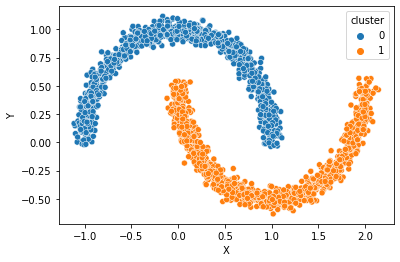

In [ ]:
db = DBSCAN(eps=0.2, min_samples=10, metric='euclidean').fit(mydata)
mydata['cluster'] = db.labels_
sns.scatterplot(mydata['X'],mydata['Y'],hue = mydata['cluster'])

Lets try increasing eps and see what effects it has . 

In [ ]:
del mydata['cluster']
db = DBSCAN(eps=0.3, min_samples=10, metric='euclidean').fit(mydata)
mydata['cluster']=db.labels_

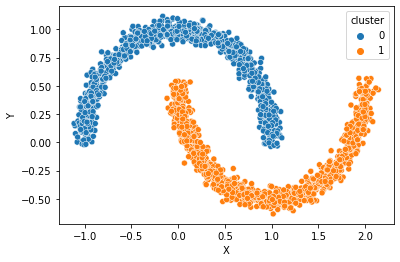

In [ ]:
sns.scatterplot(mydata['X'],mydata['Y'],hue = mydata['cluster'])

As you can see increasing neighborhood size results in all points becoming part of same cluster, which is the intended effect.

Now lets see an example where , dbscan doesnt blindly club all the points into clusters, but leave points which are not supposed to be in any clusters. This also demonstrate how k-means is different from dbscan.

In [ ]:
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

In [ ]:
df=pd.DataFrame(X,columns=['x1','x2'])
df['labels']=labels

In [ ]:
ggplot(df,aes(x='x1',y='x2',color='labels'))+geom_point()

You can see how dbscan has found outliers. You can play around with the values of eps and min_samples to see how that changes outlier detection and number of clusters detected by dbscan.
